In [100]:
import numpy as np

In [101]:
class HiddenLayer:
    def __init__(self, initialWeights, initialBias, activationFunction):
        self.w = initialWeights # weights
        self.b = initialBias    # bias
        self.i = None           # input
        self.z = None           # output
        self.d = None           # delta
        self.a = None
        self.actFunc = activationFunction
    
    def forward(self, input):
        self.i = input
        self.z = np.dot(input, self.w.T) + self.b
        self.a = self.actFunc.f(self.z)
    
    def backward(self, nextLayerDelta, nextLayerWeights):
        self.d = np.dot(nextLayerDelta, nextLayerWeights) * self.actFunc.f_prime(self.z)
    
    def update(self, learningRate):
        self.w -= learningRate * np.dot(self.d.T, self.i)
        self.b -= learningRate * self.d.sum(axis=0)

class OutputLayer(HiddenLayer):
    def __init__(self, initialWeights, initialBias, activationFunction):
        super().__init__(initialWeights, initialBias, activationFunction)
    
    def backward(self, target):
        self.d = (self.a - target) * self.actFunc.f_prime(self.z)

In [102]:
class ActivationSigmoid:
    def f(self, x):
        return 1 / (1 + np.exp(-x))
    
    def f_prime(self, x):
        return self.f(x) * (1 - self.f(x))

class ActivationReLU:
    def f(self, x):
        return np.maximum(0, x)
    
    def f_prime(self, x):
        return np.where(x > 0, 1, 0)

In [103]:
class NeuralNetwork:
    def __init__(self, layers):
        self.layers = layers
        self.cost_over_time = None
    
    def forward(self, input):
        for layer in self.layers:
            layer.forward(input)
            input = layer.a
    
    def backward(self, target):
        for i in reversed(range(len(self.layers))):
            if i == len(self.layers) - 1:
                self.layers[i].backward(target)
            else:
                self.layers[i].backward(self.layers[i+1].d, self.layers[i+1].w)
    
    def update(self, learningRate):
        for layer in self.layers:
            layer.update(learningRate)
    
    def cost(self, target):
        return (0.5 / target.shape[0]) * np.sum((target - self.layers[-1].a)**2)
    
    def train(self, X, y, learningRate, epochs):
        self.cost_over_time = []
        for _ in range(epochs):
            self.forward(X)
            self.backward(y)
            self.update(learningRate)
            self.cost_over_time.append(self.cost(y))
    
    def graph_cost_over_time(self):
        import matplotlib.pyplot as plt
        plt.plot(self.cost_over_time)
        plt.title("Cost over time")
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.show()
    
    def print(self):
        for i, layer in enumerate(self.layers):
            print("Layer", i)
            print("Weights:\n", layer.w)
            print("Bias:\n", layer.b)
            print()

In [104]:
X = np.array([[1, 0], [0, 1]], dtype=float)
y = np.array([[1], [0]], dtype=float)

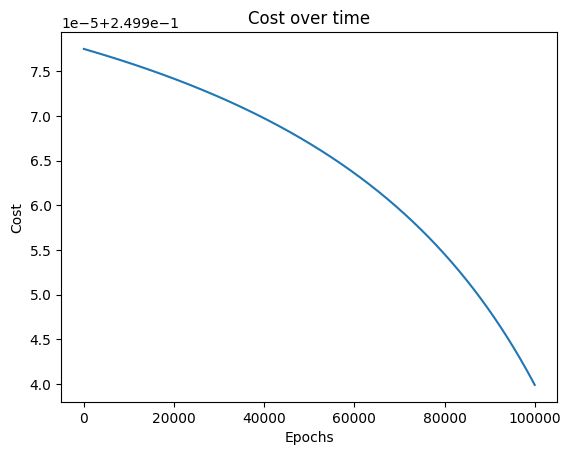

In [105]:
network = NeuralNetwork([
    HiddenLayer(np.array([[1, 2], [3, 4]], dtype=float), np.array([1, -1], dtype=float), ActivationReLU()),
    OutputLayer(np.array([[1, 2]], dtype=float), np.array([1], dtype=float), ActivationSigmoid())
])
network.train(X, y, 0.005, 100000)
network.graph_cost_over_time()